<a href="https://colab.research.google.com/github/KHANmdAFFAN/Data_science/blob/main/correcting_of_transactions_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [319]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import TweedieRegressor

In [140]:
data = pd.read_csv("/content/transactions_train.csv", nrows=70000)



In [141]:
data.shape

(70000, 10)

In [142]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


### EDA

In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            70000 non-null  int64  
 1   type            70000 non-null  object 
 2   amount          70000 non-null  float64
 3   nameOrig        70000 non-null  object 
 4   oldbalanceOrig  70000 non-null  float64
 5   newbalanceOrig  70000 non-null  float64
 6   nameDest        70000 non-null  object 
 7   oldbalanceDest  70000 non-null  float64
 8   newbalanceDest  70000 non-null  float64
 9   isFraud         70000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 5.3+ MB


In [144]:
print("The numbers of rows and column present : ",data.shape)

The numbers of rows and column present :  (70000, 10)


In [145]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [146]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



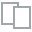
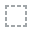
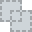
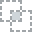
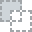
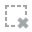
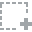
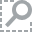
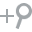
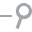
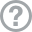
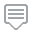
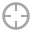
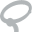
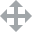
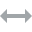
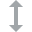
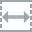
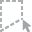
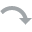
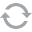
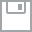
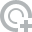
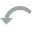
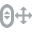
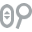
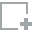
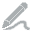
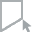
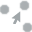
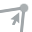
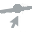

In [147]:
from dataprep.eda import plot
plot(data)

In [148]:
data.corr()

,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
step,1.000000,0.077958,0.006380,0.006003,0.000807,0.015255,-0.051891
amount,0.077958,1.000000,-0.001666,-0.008362,0.267828,0.389002,0.047685
oldbalanceOrig,0.006380,-0.001666,1.000000,0.998968,0.108379,0.075509,-0.004500
newbalanceOrig,0.006003,-0.008362,0.998968,1.000000,0.110478,0.075120,-0.012283
oldbalanceDest,0.000807,0.267828,0.108379,0.110478,1.000000,0.930485,-0.010565
newbalanceDest,0.015255,0.389002,0.075509,0.075120,0.930485,1.000000,-0.007141
isFraud,-0.051891,0.047685,-0.004500,-0.012283,-0.010565,-0.007141,1.000000


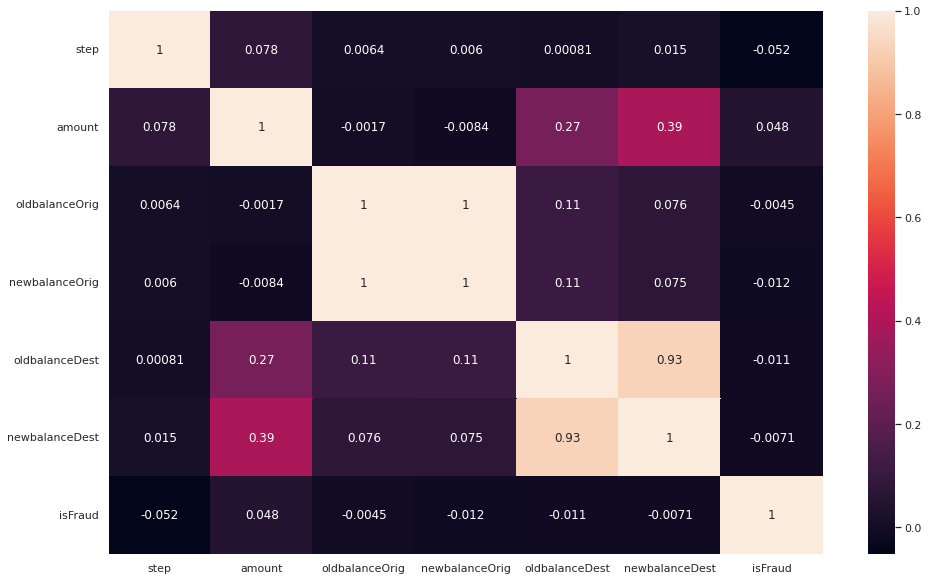

In [149]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

**oldbalanceOrig**	*and* **newbalanceOrig** *are* *highly* *correlated* *to* *each* *other* in positve *direction*

**oldbalanceDest**	and **newbalanceDest** are highly correlated *to* each other in positive direction


### SKEWNESS

In [150]:
from scipy.stats import skew

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [151]:
data.skew()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


step              -2.562671
amount             5.686558
oldbalanceOrig     5.075959
newbalanceOrig     5.005988
oldbalanceDest     4.958645
newbalanceDest     4.186244
isFraud           25.519307
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


step
-2.5626157032309065


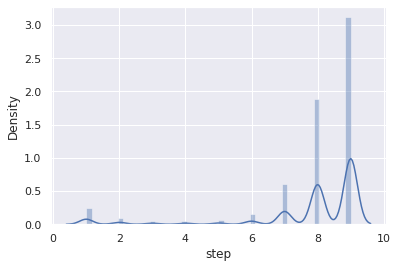

amount
5.686435931106824


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


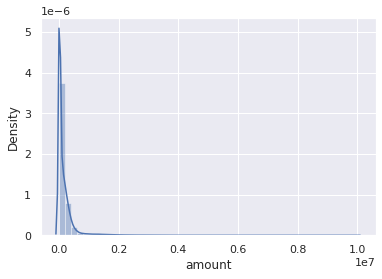

oldbalanceOrig
5.075850466805661


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


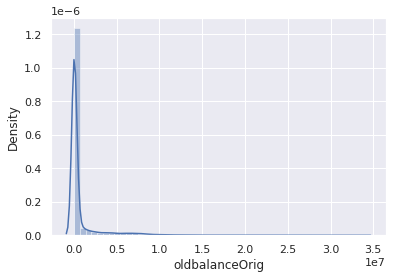

newbalanceOrig
5.005880911641078


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


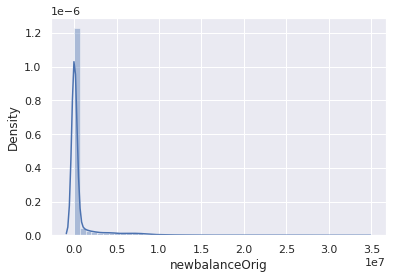

oldbalanceDest
4.9585385807233076


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


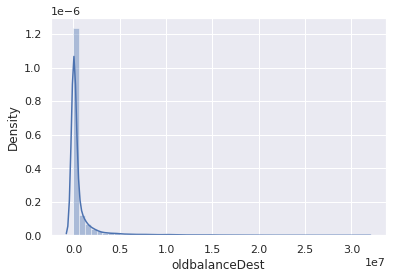

newbalanceDest
4.186154270277978


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


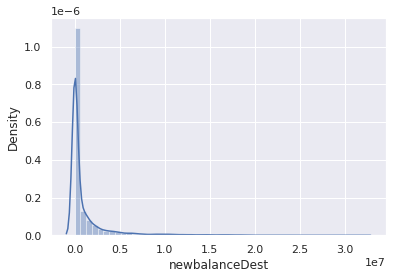

isFraud
25.518760518257395


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


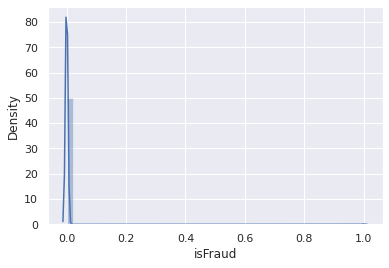

In [152]:
cols = ["step","amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]

for col in cols:
  print(col)
  print(skew(data[col]))

  plt.figure()
  sns.distplot(data[col])
  plt.show()


### HANDLING SKEWED VALUE

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


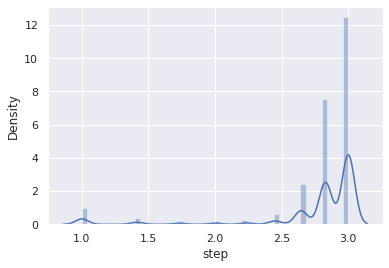

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


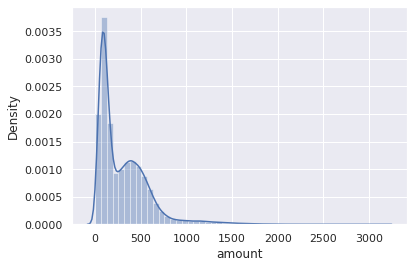

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


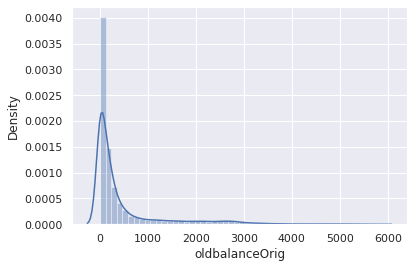

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


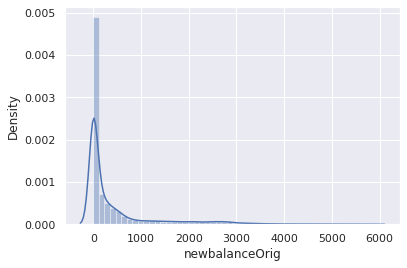

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


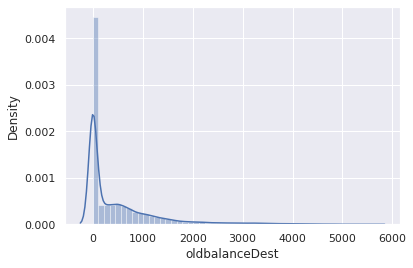

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


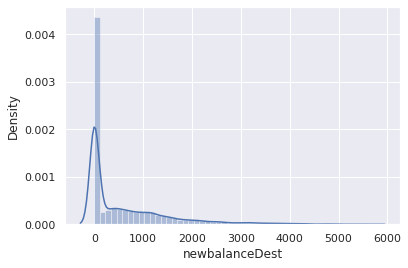

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


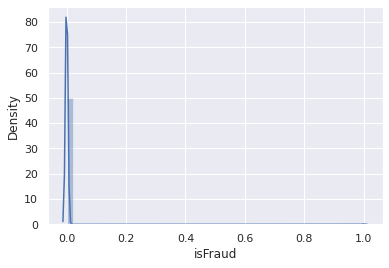

In [153]:
cols = ["step","amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]

for col in cols :
  sol = np.sqrt(data[col])

  plt.figure()
  sns.distplot(sol)
  plt.show()
 



In [154]:
data['step'] = np.log(data['step'])

data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [155]:
data['oldbalanceOrig']= np.log(data['oldbalanceOrig'])
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9839.64,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,1864.28,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,181.00,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,181.00,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,11668.14,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0


In [156]:
data['amount']= np.log(data['amount'])
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0


### FINDING OF OUTLIER

In [157]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0


In [158]:
def outlier(value):

  Q1 = value.quantile(0.25)
  Q3 = value.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  plot2 = value.plot.box(autorange=True)
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit,plot2

OUTLIER OF STEP

IQR,lower_limit,upper_limit


(0.11778303565638382,
 1.90276698819526,
 2.3738991308207953,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0fee28e910>)

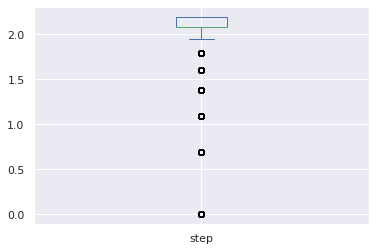

In [159]:
outlier(data['step'])

OUTLIER OF AMOUNT

IQR,lower_limit,upper_limit


(3.0955565500272364,
 4.462591804923397,
 16.844818005032344,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0fed5d7bd0>)

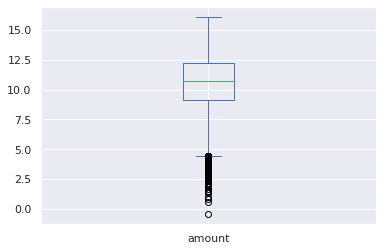

In [160]:
outlier(data['amount'])

OUTLIER OF oldbalanceOrig

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


IQR,lower_limit,upper_limit


(nan, nan, nan, <matplotlib.axes._subplots.AxesSubplot at 0x7f0fed54bd10>)

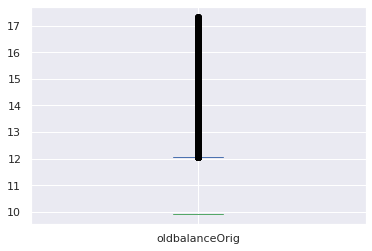

In [161]:
outlier(data['oldbalanceOrig'])

OUTLIER OF newbalanceOrig

IQR,lower_limit,upper_limit


(194974.34,
 -292461.51,
 487435.85,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0fed77d910>)

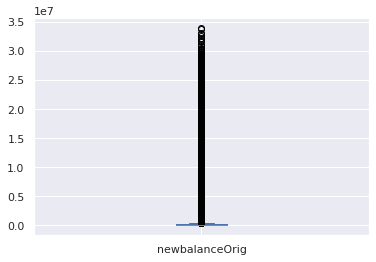

In [162]:
outlier(data['newbalanceOrig'])

OUTLIER OF oldbalanceDest

IQR,lower_limit,upper_limit


(518592.2425,
 -777888.36375,
 1296480.60625,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0fed8d24d0>)

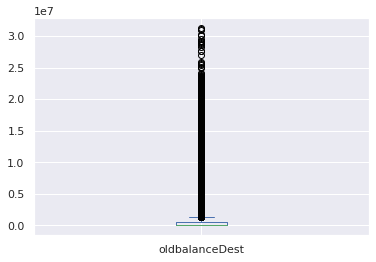

In [163]:
outlier(data['oldbalanceDest'])

OUTLIER OF newbalanceDest

IQR,lower_limit,upper_limit


(982411.35,
 -1473617.025,
 2456028.375,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0fed648510>)

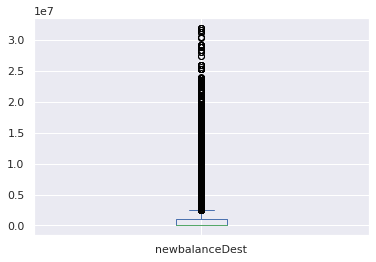

In [164]:
outlier(data['newbalanceDest'])

### REMOVING OUTLIER

In [165]:
def outlier_re(value2):
  Q1 = value2.quantile(0.25)
  Q3 = value2.quantile(0.75)
  IQR = Q3-Q1
  lower_limit =  Q1- 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit,upper_limit
  resolve_outlier = data[(value2<lower_limit)|(value2>upper_limit)].head()
  return resolve_outlier


## HANDLING OUTLIER OF STEP

In [166]:
outlier_re(data['step'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0


In [167]:
Q1= data['step'].quantile(0.25)
Q3 = data['step'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['step']<lower_limit)|(data['step']>upper_limit)]

In [168]:
no_outlier = data[(data['step']>lower_limit)&(data['step']<upper_limit)]

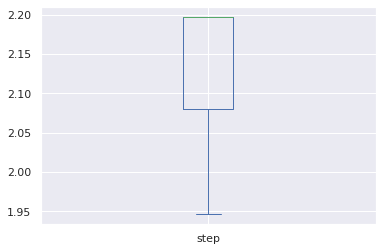

In [169]:
no_outlier['step'].plot.box()

## HANDLING THE OUTLIER OF AMOUNT

In [170]:
outlier_re(data['amount'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
56,0.0,PAYMENT,3.654805,C343345308,9.691160,16135.34,M1714688478,0.0,0.0,0
125,0.0,PAYMENT,2.166765,C38603201,11.306061,81304.27,M1422273905,0.0,0.0,0
130,0.0,PAYMENT,3.223664,C1257299717,11.029439,61637.88,M1474957626,0.0,0.0,0
513,0.0,PAYMENT,4.064057,C235370598,9.582318,14447.79,M248710794,0.0,0.0,0
556,0.0,PAYMENT,4.433432,C1100109058,10.159214,25743.78,M333693383,0.0,0.0,0


In [171]:
Q1= data['amount'].quantile(0.25)
Q3 = data['amount'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['amount']<lower_limit)|(data['amount']>upper_limit)]

HANDLING OUTLIER OF oldbalanceOrig

In [172]:
outlier_re(data['oldbalanceOrig'])

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


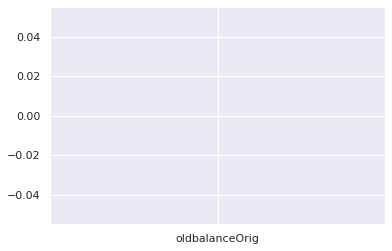

In [173]:
Q1= data['oldbalanceOrig'].quantile(0.25)
Q3 = data['oldbalanceOrig'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['oldbalanceOrig']<lower_limit)|(data['oldbalanceOrig']>upper_limit)]
no_outlier = data[(data['oldbalanceOrig']>lower_limit)&(data['oldbalanceOrig']<upper_limit)]
no_outlier['oldbalanceOrig'].plot.box()

HANDLING OUTLIER OF newbalanceOrig

In [174]:
outlier_re(data['newbalanceOrig'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
14,0.0,PAYMENT,8.318445,C1026483832,13.128870,499165.22,M1635378213,0.0,0.0,0
62,0.0,DEBIT,9.074262,C166694583,13.690820,874042.26,C1129670968,12636.0,0.0,0
63,0.0,PAYMENT,7.863059,C885910946,13.680884,871442.79,M1860591867,0.0,0.0,0
241,0.0,PAYMENT,8.441430,C1110698130,15.658245,6309146.87,M125644421,0.0,0.0,0
242,0.0,PAYMENT,7.145172,C1053632127,15.657511,6307878.90,M1493158871,0.0,0.0,0


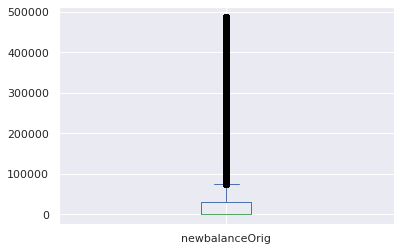

In [175]:
Q1= data['newbalanceOrig'].quantile(0.25)
Q3 = data['newbalanceOrig'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['newbalanceOrig']<lower_limit)|(data['newbalanceOrig']>upper_limit)]
no_outlier = data[(data['newbalanceOrig']>lower_limit)&(data['newbalanceOrig']<upper_limit)]
no_outlier['newbalanceOrig'].plot.box()

In [176]:
outlier_re(data['oldbalanceDest'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
89,0.0,TRANSFER,14.172521,C1520267010,-inf,0.0,C1590550415,2041543.62,19169204.93,0
94,0.0,TRANSFER,14.360672,C1495608502,-inf,0.0,C1590550415,3470595.10,19169204.93,0
96,0.0,TRANSFER,13.273012,C843299092,-inf,0.0,C1590550415,5195482.15,19169204.93,0
113,0.0,CASH_OUT,11.355378,C460741164,-inf,0.0,C1590550415,5776776.41,19169204.93,0
156,0.0,CASH_OUT,12.135905,C976827477,-inf,0.0,C1590550415,5862200.03,19169204.93,0


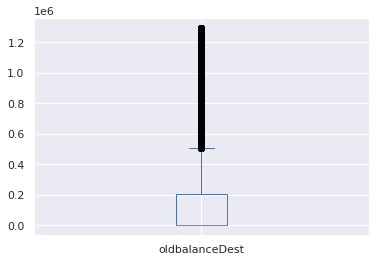

In [177]:
Q1= data['oldbalanceDest'].quantile(0.25)
Q3 = data['oldbalanceDest'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['oldbalanceDest']<lower_limit)|(data['oldbalanceDest']>upper_limit)]
no_outlier = data[(data['oldbalanceDest']>lower_limit)&(data['oldbalanceDest']<upper_limit)]
no_outlier['oldbalanceDest'].plot.box()

In [178]:
outlier_re(data['newbalanceDest'])

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
24,0.0,TRANSFER,12.649751,C1984094095,9.290537,0.0,C932583850,6267.0,2719172.89,0
48,0.0,CASH_OUT,8.584270,C512549200,-inf,0.0,C248609774,652637.0,6453430.91,0
83,0.0,TRANSFER,11.743025,C1443967876,-inf,0.0,C392292416,348512.0,3420103.09,0
84,0.0,TRANSFER,12.847548,C1449772539,-inf,0.0,C1590550415,900180.0,19169204.93,0
85,0.0,TRANSFER,14.224719,C926859124,-inf,0.0,C665576141,29031.0,5515763.34,0


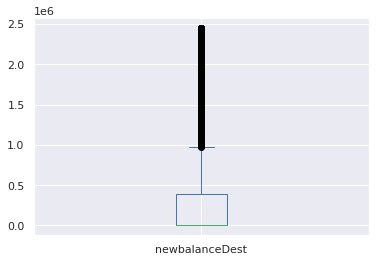

In [179]:
Q1= data['newbalanceDest'].quantile(0.25)
Q3 = data['newbalanceDest'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = data[(data['newbalanceDest']<lower_limit)|(data['newbalanceDest']>upper_limit)]
no_outlier = data[(data['newbalanceDest']>lower_limit)&(data['newbalanceDest']<upper_limit)]
no_outlier['newbalanceDest'].plot.box()

## ONEHOTENCODING

In [180]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0.0,PAYMENT,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0
1,0.0,PAYMENT,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0
2,0.0,TRANSFER,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1
3,0.0,CASH_OUT,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1
4,0.0,PAYMENT,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0


In [181]:
data1 = pd.get_dummies(data,columns=['type'])


In [182]:
data1.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,0.0,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,0.0,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,0.0,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,0.0,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [183]:
import pandas as pd
import numpy as np

def clean_dataset(data1):
    assert isinstance(data1, pd.DataFrame), "data1 needs to be a pd.DataFrame"
    data1.dropna(inplace=True)
    indices_to_keep = ~data1.isin([np.nan, np.inf, -np.inf]).any(1)
    return data1[indices_to_keep].astype(np.float64)

In [184]:
data1.replace([np.inf, -np.inf], np.nan, inplace=True)


In [185]:
data1.isnull().sum()

step                  0
amount                0
nameOrig              0
oldbalanceOrig    21535
newbalanceOrig        0
nameDest              0
oldbalanceDest        0
newbalanceDest        0
isFraud               0
type_CASH_IN          0
type_CASH_OUT         0
type_DEBIT            0
type_PAYMENT          0
type_TRANSFER         0
dtype: int64

In [186]:
cols = ["step","amount","oldbalanceOrig","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]
for col in cols:
  data1[col].fillna(data1[col].median(), inplace=True)

In [187]:
X = data1.drop(['isFraud','nameOrig','nameDest'],axis=1)
y = data1['isFraud']

In [188]:
print(X.ndim)
print(y.ndim)

2
1


### 80/20 Data Split

In [189]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state = 0)

In [190]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (56000, 11)
Number transactions y_train dataset:  (56000,)
Number transactions X_test dataset:  (14000, 11)
Number transactions y_test dataset:  (14000,)


USING LOGISTIC REGRESSION

In [191]:
import pandas as pd
import numpy as np

def clean_dataset(data1):
    assert isinstance(data1, pd.DataFrame), "data1 needs to be a pd.DataFrame"
    data1.dropna(inplace=True)
    indices_to_keep = ~data1.isin([np.nan, np.inf, -np.inf]).any(1)
    return data1[indices_to_keep].astype(np.float64)

In [192]:
from sklearn.metrics import confusion_matrix, classification_report

In [193]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( fit_intercept=True)
lr.fit(X_train,y_train)

LogisticRegression()

In [194]:
lr.score(X_test,y_test)

0.9985714285714286

In [195]:
predictions = lr.predict(X_test)

In [196]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13981
           1       0.00      0.00      0.00        19

    accuracy                           1.00     14000
   macro avg       0.50      0.50      0.50     14000
weighted avg       1.00      1.00      1.00     14000



In [197]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)) )
print("Before OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 88
Before OverSampling, counts of label '0': 55912


USING RANDOM UNDER SAMPLER

In [198]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


In [199]:
rus = RandomUnderSampler()
X_res, y_res = rus.fit_resample(X_train, y_train.ravel())

In [200]:
print("After underSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After underSampling, counts of label '0': {}".format(sum(y_res == 0)))

After underSampling, counts of label '1': 88
After underSampling, counts of label '0': 88


USING LOGISTIC REGRESSION

In [201]:
lr1 = LogisticRegression(fit_intercept = True)
lr1.fit(X_res, y_res)
prediction1 = lr1.predict(X_test)

In [202]:
lr1.score(X_test,y_test)

0.6912142857142857

In [203]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82     13981
           1       0.00      0.68      0.01        19

    accuracy                           0.69     14000
   macro avg       0.50      0.69      0.41     14000
weighted avg       1.00      0.69      0.82     14000



USING RANDOM FOREST FOR MORE INSIGHT

In [204]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_res,y_res)
rf.score(X_test,y_test)

0.9153571428571429

In [205]:
predic_rf = rf.predict(X_test)

In [206]:
print(classification_report(y_test, predic_rf))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     13981
           1       0.01      0.95      0.03        19

    accuracy                           0.92     14000
   macro avg       0.51      0.93      0.49     14000
weighted avg       1.00      0.92      0.95     14000



USING SMOTE

In [207]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

In [208]:
sm = SMOTE(random_state=42)
X_res_sm, y_res_sm = sm.fit_resample(X_train, y_train)

In [209]:
lr3 = LogisticRegression(fit_intercept = True)
lr3.fit(X_res_sm, y_res_sm)

LogisticRegression()

In [210]:
lr3.score(X_res_sm, y_res_sm)

0.7445181714122192

In [211]:
prediction3 = lr3.predict(X_test)

In [212]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     13981
           1       0.00      0.68      0.01        19

    accuracy                           0.72     14000
   macro avg       0.50      0.70      0.42     14000
weighted avg       1.00      0.72      0.84     14000



In [213]:
from imblearn.under_sampling import NearMiss
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier


## NEAR MISS

In [214]:
nm = NearMiss()
X_res_miss, y_res_miss = nm.fit_resample(X_train, y_train)

In [215]:
print("After NearMiss, counts of label '1': {}".format(sum(y_res_miss == 1)))
print("After NearMiss, counts of label '0': {}".format(sum(y_res_miss == 0)))

After NearMiss, counts of label '1': 88
After NearMiss, counts of label '0': 88


XGBOOST

In [216]:
import xgboost as xgb
model=xgb.XGBClassifier(learning_rate=0.1,max_depth=50,n_estimators=50)
model.fit(X_res_miss, y_res_miss)


XGBClassifier(max_depth=50, n_estimators=50)

In [217]:
model.score(X_res_miss, y_res_miss)

0.9886363636363636

In [218]:
prediction4 = model.predict(X_test)
prediction4

array([0, 1, 0, ..., 0, 1, 1])

In [219]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60     13981
           1       0.00      1.00      0.00        19

    accuracy                           0.43     14000
   macro avg       0.50      0.71      0.30     14000
weighted avg       1.00      0.43      0.60     14000



In [242]:
data1.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0.0,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0
1,0.0,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0
2,0.0,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1,0,0,0,0,1
3,0.0,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0
4,0.0,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0


In [320]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster

In [301]:
k = range(1,11)
wss= []
for i in k:
  km = KMeans(n_clusters=i)
  km.fit(data1[['amount','oldbalanceOrig']])
  wss.append(km.inertia_)     

In [302]:
wss     #----- intertia_ WSS score

[638516.9714570346,
 406620.2225015484,
 252518.1494034766,
 169575.74504246234,
 143651.35190724794,
 122744.30371606958,
 107587.79309216666,
 96298.51921124008,
 85391.35369332573,
 75940.51920479845]

In [303]:
my_centers = pd.DataFrame({'Clusters' : k, 'WSS' : wss})
my_centers

,Clusters,WSS
0,1,638516.971457
1,2,406620.222502
2,3,252518.149403
3,4,169575.745042
4,5,143651.351907
5,6,122744.303716
6,7,107587.793092
7,8,96298.519211
8,9,85391.353693
9,10,75940.519205


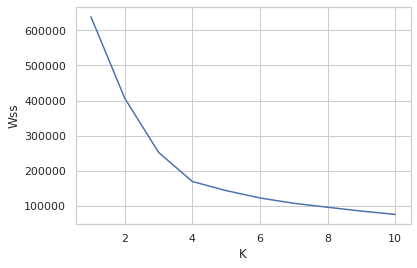

In [304]:
plt.xlabel('K')
plt.ylabel('Wss')
plt.plot(k,wss)

In [314]:
kmeans =cluster.KMeans(n_clusters=4,init="k-means++")
kmeans = kmeans.fit(data1[['amount','oldbalanceOrig']])
km1 = kmeans.fit_predict(data1[['amount','oldbalanceOrig']])
km1

array([1, 1, 3, ..., 1, 2, 1], dtype=int32)

In [337]:
data1['Clusters'] = km1
data1.head()

,step,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,Clusters
0,0.0,9.194174,C1231006815,12.044353,160296.36,M1979787155,0.0,0.0,0,0,0,0,1,0,1
1,0.0,7.530630,C1666544295,9.964065,19384.72,M2044282225,0.0,0.0,0,0,0,0,1,0,1
2,0.0,5.198497,C1305486145,5.198497,0.00,C553264065,0.0,0.0,1,0,0,0,0,1,3
3,0.0,5.198497,C840083671,5.198497,0.00,C38997010,21182.0,0.0,1,0,1,0,0,0,3
4,0.0,9.364617,C2048537720,10.634749,29885.86,M1230701703,0.0,0.0,0,0,0,0,1,0,1


In [322]:
kmeans.cluster_centers_ #----- center of 4 cluster

array([[11.41562567, 14.98511227],
       [ 8.77390542, 10.93628454],
       [12.27073142, 10.84438002],
       [10.18274145,  6.46911801]])

In [323]:
df1 = data1[data1.Clusters == 1]
df2 = data1[data1.Clusters == 2]
df3 = data1[data1.Clusters == 3]

No handles with labels found to put in legend.


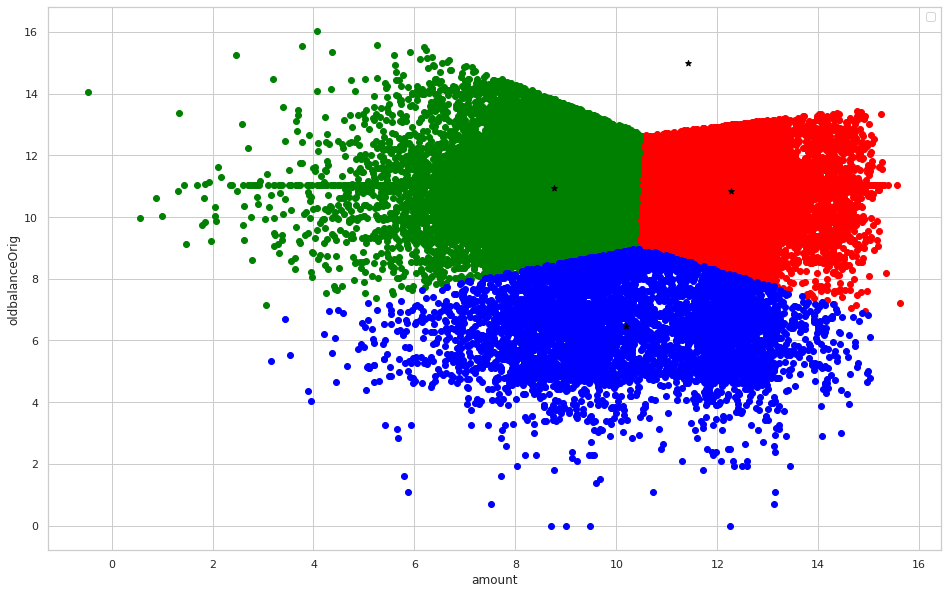

In [339]:
plt.figure(figsize=(16,10))
plt.scatter(df1['amount'],df1['oldbalanceOrig'],color='green')
plt.scatter(df2.amount,df2['oldbalanceOrig'],color='red')
plt.scatter(df3.amount,df3['oldbalanceOrig'],color='blue')
plt.xlabel('amount')
plt.ylabel('oldbalanceOrig')
plt.legend()
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color ='black', marker = '*',label='centroid')




In [324]:
data1['Clusters'] = kmeans.labels_

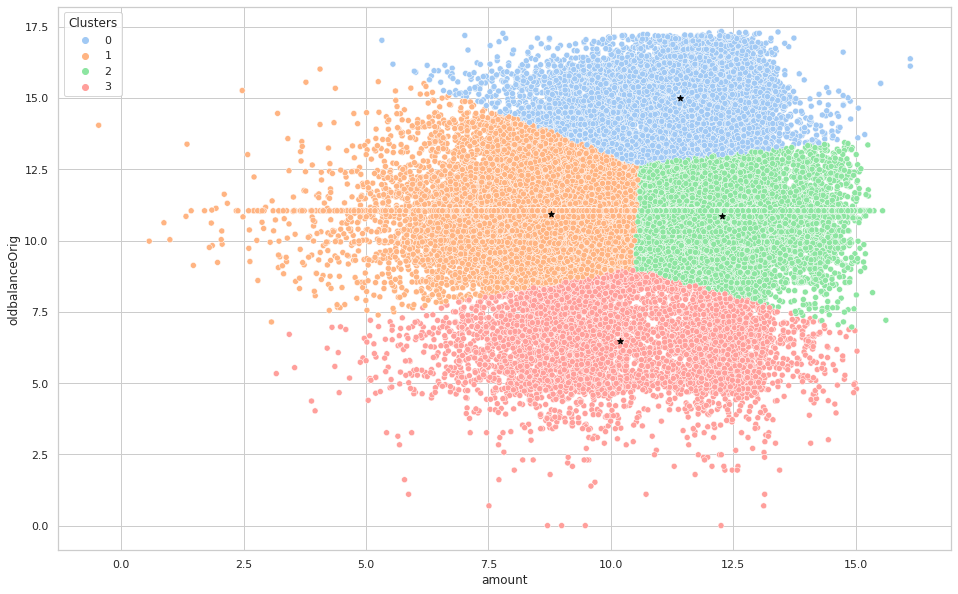

In [338]:
plt.figure(figsize=(16,10))
sns.set_style('whitegrid')
sns.scatterplot(x='amount' , y = 'oldbalanceOrig',hue='Clusters', data = data1,palette='pastel')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color ='black', marker = '*',label='centroid')
plt.show()


